# The two most common types of recommender systems are 
## content-based (similarity between items)
## collaborative filtering (wisdom of the crowd)

In [12]:
import numpy as np
import pandas as pd
import time

In [2]:
columns_names = ['user_id', 'item_id', 'rating', 'timestamp']

In [7]:
df = pd.read_csv('u.data', sep='\t', names=columns_names)

In [35]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [17]:
import datetime

In [33]:
#df['timestamp'].apply(datetime.datetime.fromtimestamp)
titles = pd.read_csv('Movie_Id_Titles')

In [34]:
titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [36]:
df = pd.merge(df, titles, on='item_id')

In [37]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [51]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [58]:
ratings['Num of ratings'] = df.groupby('title')['rating'].count()

In [66]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1664 entries, 'Til There Was You (1997) to Á köldum klaka (Cold Fever) (1994)
Data columns (total 2 columns):
rating            1664 non-null float64
Num of ratings    1664 non-null int64
dtypes: float64(1), int64(1)
memory usage: 39.0+ KB


(array([ 69.,   0.,   1.,   0.,   2.,   4.,   0.,   1.,  11.,   0.,   4.,
          7.,   4.,   3.,   9.,   7.,   6.,  52.,   3.,   7.,  19.,  26.,
         15.,  17.,  34.,  20.,  45.,  21.,  27.,  43.,  45.,  38.,  36.,
         32.,  12., 127.,  40.,  63.,  46.,  45.,  57.,  32.,  53.,  59.,
         42.,  49.,  52.,  36.,  45.,  46.,  34.,  35.,  64.,  24.,  27.,
         14.,  15.,  11.,   5.,   2.,   5.,   5.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,  10.]),
 array([1.        , 1.05714286, 1.11428571, 1.17142857, 1.22857143,
        1.28571429, 1.34285714, 1.4       , 1.45714286, 1.51428571,
        1.57142857, 1.62857143, 1.68571429, 1.74285714, 1.8       ,
        1.85714286, 1.91428571, 1.97142857, 2.02857143, 2.08571429,
        2.14285714, 2.2       , 2.25714286, 2.31428571, 2.37142857,
        2.42857143, 2.48571429, 2.54285714, 2.6       , 2.65714286,
        2.71428571, 2.77142857, 2.82857143, 2.88571429, 2.94285714,
        3.        , 3.05714286, 3.11428571, 3.

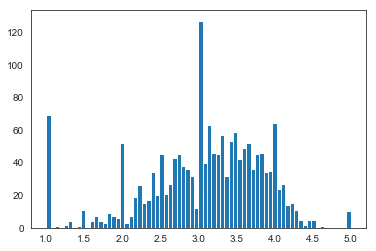

In [61]:
plt.hist(ratings['rating'], bins=70)

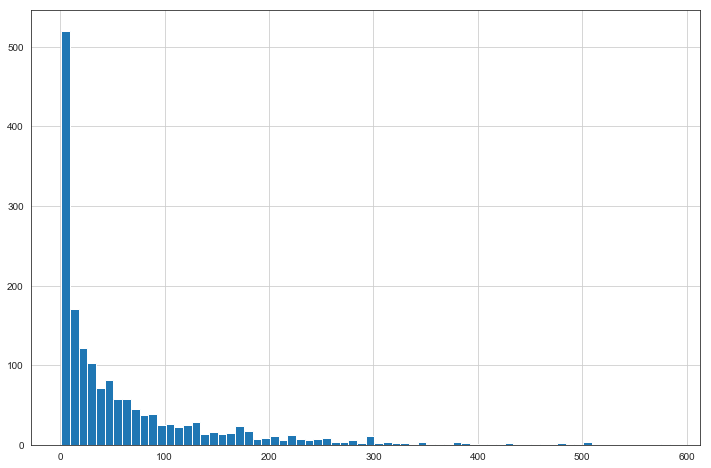

In [65]:
plt.figure(figsize=(12, 8))
ratings['Num of ratings'].hist(bins=70)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


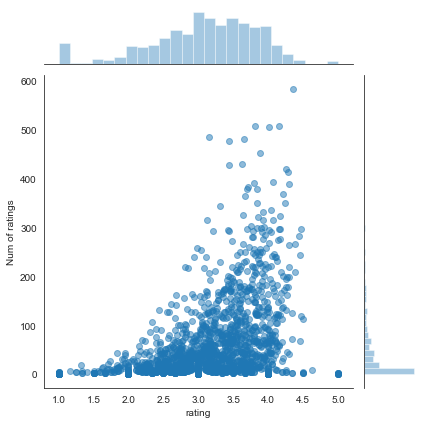

In [67]:
sns.jointplot('rating', 'Num of ratings', data=ratings, alpha=0.5)

In [68]:
df.columns

Index(['user_id', 'item_id', 'rating', 'timestamp', 'title'], dtype='object')

In [69]:
moviemat = df.pivot_table(index='user_id', columns='title', values='rating')

In [70]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 # target for the up next cells is to find the similar  movies to the the movie we chose, and that from the prespective of the correlation of users ratings
 ## meaning the movies with correlated rating patterns are the best recommendations for users who like one of the these movies.

In [75]:
ratings.sort_values('Num of ratings', ascending=False).head()

,rating,Num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [76]:
starwars_ratings = moviemat['Star Wars (1977)']
liarliar_ratings = moviemat['Liar Liar (1997)']

In [79]:
corr_starwars = moviemat.corrwith(starwars_ratings)
corr_liarliar = moviemat.corrwith(liarliar_ratings)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [83]:
corr_starwars = pd.DataFrame(corr_starwars, columns=['Correlation'])
corr_liarliar = pd.DataFrame(corr_liarliar, columns=['Correlation'])

In [85]:
corr_liarliar.dropna(inplace=True)
corr_starwars.dropna(inplace=True)

In [86]:
liarliar_recom = corr_liarliar.join(ratings['Num of ratings'])
starwars_recom = corr_starwars.join(ratings['Num of ratings'])

In [92]:
liarliar_recom.sort_values('Correlation', inplace=True, ascending = False)

In [95]:
liarliar_recom[liarliar_recom['Num of ratings'] > 100].head()

,Correlation,Num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [98]:
starwars_recom[starwars_recom['Num of ratings'] > 100].head()

,Correlation,Num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [97]:
starwars_recom.sort_values('Correlation', inplace=True, ascending=False)